# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 
                            'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8)})
from matplotlib_venn import venn2

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [4]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"
path2 = 'dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_filtered.csv', sep = ",")

#remove Survival information
df_ATG7_Normal.drop(df_ATG7_Normal.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(4453, 20)
Wall time: 22.9 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.293,2.958,1.860,-0.0725,19.601965,7.769460,3.629077,0.949989,4.364710,3.132488,2.210724,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


# III] ATG7 expression

## A) ATG7 expression

In [5]:
#Verification of no values are negative
columns = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
for column in columns:
    print(df_ATG7_Normal[column].min())

0.0
0.0
0.0


In [6]:
df_ATG7_Normal.head()

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.293,2.958,1.860,-0.0725,19.601965,7.769460,3.629077,0.949989,4.364710,3.132488,2.210724,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138
2,GTEX-11TT1-0126-SM-5LUAA,Normal Tissue,Adrenal Gland,4.271,2.862,2.161,0.2029,19.305303,7.269225,4.471247,1.150010,4.343785,3.047752,2.451870,12.890482,56.392188,34.686425,8.921386,0.376540,0.231607
3,GTEX-O5YT-1326-SM-3MJGR,Normal Tissue,Adrenal Gland,4.224,3.098,1.496,-0.2159,18.686478,8.561310,2.819596,0.860009,4.299133,3.257208,1.933420,12.240914,69.940115,23.034194,7.025691,0.458155,0.150890
4,GTEX-11NSD-0226-SM-5A5LR,Normal Tissue,Adrenal Gland,4.218,2.945,1.665,-1.5950,18.608921,7.699756,3.170137,0.330022,4.293438,3.120975,2.060095,11.199914,68.748343,28.305007,2.946650,0.413767,0.170356


In [7]:
df_ATG7_Normal.head(1)

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615


4453


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


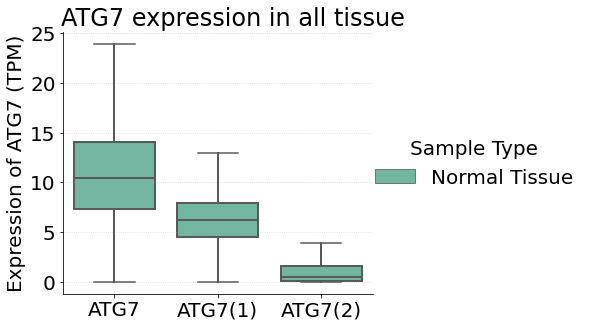

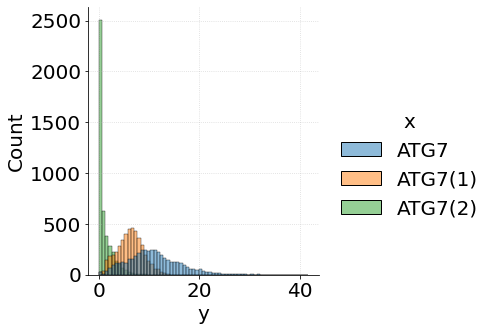

In [8]:
# Distribution: Data preparation + graph
Data = df_ATG7_Normal
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(7,10)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'ATG7'
data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
data_distrib.loc[shape*2:,'x'] = 'ATG7(2)'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph 1
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in '+ info, x=.55)
plt.show()
plt.close()

#graph 2
seaborn.displot(data_distrib, x= "y", hue= "x")

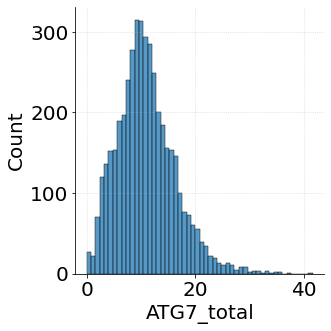

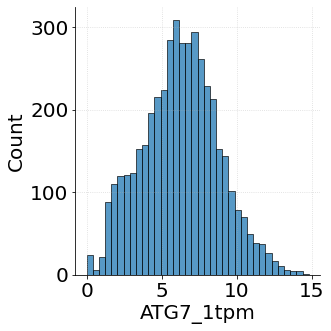

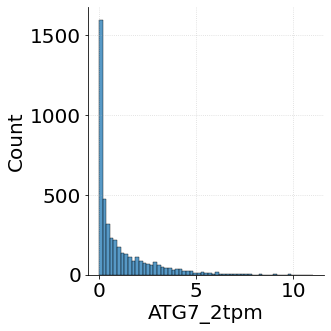

In [9]:
# Distribution graph, for ATG7, iso1 & iso2
## TPM + Count Scale
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'
df_ATG7_Normal
  
Data = df_ATG7_Normal[['Sample_Type', 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm']]

seaborn.displot(Data, x= isoforms[0])
seaborn.displot(Data, x= isoforms[1])
seaborn.displot(Data, x= isoforms[2])
#     plt.ylabel('Number of samples')
#     plt.xlabel(isoforms_info[i] + ' expression [TPM]')
#     plt.title(isoforms_info[i]+ ' expression ')
#     title_file = 'distrib_' + isoforms_info[i]

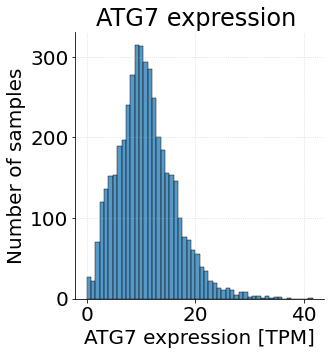

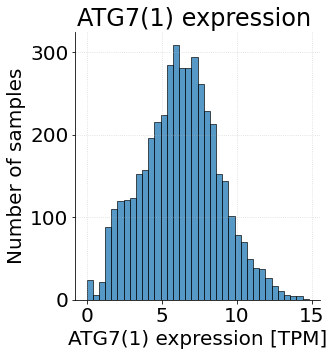

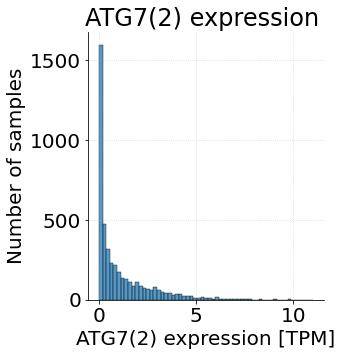

In [10]:
# Distribution graph, for ATG7, iso1 & iso2
## TPM + Count Scale
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'
df_ATG7_Normal
for i in range(len(isoforms)):
    isoform = isoforms[i]
    Data = df_ATG7_Normal[['Sample_Type', isoform]]

    seaborn.displot(Data, x= isoform)
    plt.ylabel('Number of samples')
    plt.xlabel(isoforms_info[i] + ' expression [TPM]')
    plt.title(isoforms_info[i]+ ' expression ')
    title_file = 'distrib_' + isoforms_info[i]

## B) Percentage do not express ATG7 isoforms

In [11]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal, 'all normal tissue']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)'], ['ATG7_3tpm', 'ATG7(3)']]

for df in all_dfs:
  print(df[1].upper())
  for isoform in isoforms:
        
    what = isoform[1]
    all_ = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all_
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', what)
  print()


ALL NORMAL TISSUE
0.5 % of tumor do not express ATG7
0.5 % of tumor do not express ATG7(1)
29.3 % of tumor do not express ATG7(2)
63.8 % of tumor do not express ATG7(3)



In [12]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal, 'Normal Tissue']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)']]

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []
    
for df in all_dfs:
    for isoform in isoforms:
        #save what isoform
        what.append(isoform[1])
        #save sample_type
        sample_type.append(df[1])
        #have total sample number
        all_ = (df[0][isoform[0]]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[0][isoform[0]]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

        #create a dictionnary and convert to dataframe
        d = dict(Isoforms = what, who_dontexp = who_dontexp, 
                 Percentage = perc_noexp, Sample_Type = sample_type)
        df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
        df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib


,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7,22,0.5,Normal Tissue
1,ATG7(1),22,0.5,Normal Tissue
2,ATG7(2),1304,29.3,Normal Tissue


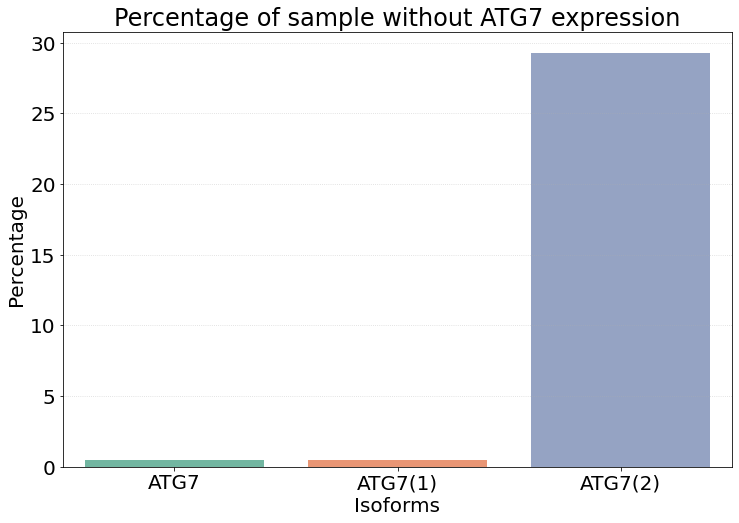

In [13]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)


plt.savefig(path+path2+'percentage_expression.svg')